<a href="https://colab.research.google.com/github/MichalRozenwald/epiCausality/blob/main/analize_exracted_reads_cas9_GM_24Apr23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.axes import Axes 
import seaborn as sns
import scipy
import pandas as pd
import numpy as np

# from dimelo import plot_enrichment_profile, load_processed, parse_bam, utils
# import pysam

# from . import load_processed
# from . import utils

In [2]:
import sys
from pathlib import Path

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    # main,
)

modkit found with expected version 0.2.4


In [3]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
# "/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads"
save_folder_path

'/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output'

In [4]:
# cd55_30pbRIO_padded_reads_24Apr16.npy
save_name_np = "padded_reads.npy"
#  "cd55_30pbRIO_padded_reads_24Apr16.npy"
Path(save_folder_path, save_name_np)

PosixPath('/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output/padded_reads.npy')

In [5]:
# # cd55_30pbRIO_padded_reads =  padded_reads
padded_reads = np.load(Path(save_folder_path, save_name_np))

In [6]:

    ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
    # t2t_v1_1_cd55_30bps     # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
    region_chr = 'chr1'
    region_start = 206586162
    region_end = 206586192
    region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
    region_length = region_end - region_start
    print("region_length", region_length)

    motifs=['CG,0']
    ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


region_length 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30


In [7]:
padded_reads_df = pd.DataFrame(padded_reads)
# padded_reads_df
padded_reads_df.columns = ref_seq_list
padded_reads_df

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
977,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
978,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# save_name_csv = "cd55_30pbRIO_padded_reads_24Apr16.csv"

# padded_reads_pd = pd.read_csv(Path(save_folder_path,save_name_csv), index_col=0)
# padded_reads_pd

In [9]:
# padded_reads_pd.columns

In [10]:
# padded_reads  = cd55_30pbRIO_padded_reads
# padded_reads

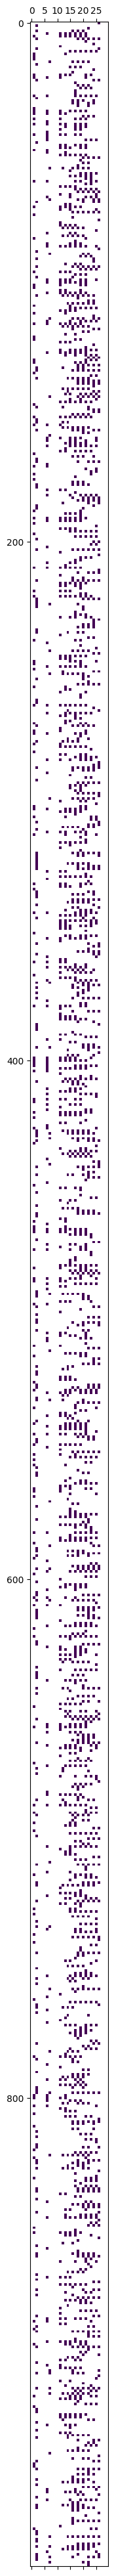

In [11]:
plt.figure(figsize=(10,50))
plt.matshow(padded_reads, fignum=1)


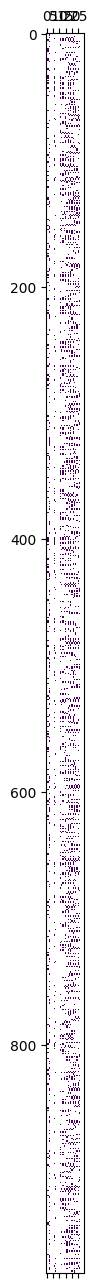

In [12]:
plt.matshow(padded_reads, fignum=1)

In [13]:
padded_reads_df.describe()

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
count,0.0,140.0,193.0,0.0,0.0,0.0,133.0,38.0,0.0,0.0,...,189.0,221.0,191.0,142.0,168.0,122.0,147.0,0.0,0.0,0.0
mean,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
std,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
min,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
25%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
50%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
75%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
max,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


> is it true, that ONLy of the Cg or cG pair is methylated for each read!!!

>> make sure that non of the A and non-CG-s have NO signal

>> Join the CG of the reverse and forward string into a single unit!!
- look to call each read - only the coresponding only C and only G suppospse to have signal -> take the reverse and shift them by one position
+ remove all the non-CG
->>> single vectoce of CG units << 15 feautures ! => aligned to sequence

In [14]:
padded_reads_df.shape#[0]

(981, 30)

# Stat / Counts per each read

In [15]:
padded_reads_df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,971,972,973,974,975,976,977,978,979,980
count,1.0,1.0,1.0,4.0,7.0,7.0,6.0,1.0,1.0,1.0,...,1.0,5.0,8.0,6.0,2.0,3.0,6.0,1.0,3.0,1.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
padded_reads.sum(axis=0, ).shape

(30,)

In [17]:
read_sums = np.nansum(padded_reads, axis=1)
read_sums.shape, read_sums

((981,),
 array([1., 1., 1., 4., 7., 7., 6., 1., 1., 1., 2., 6., 2., 1., 1., 5., 1.,
        3., 1., 1., 6., 4., 3., 1., 3., 3., 1., 1., 7., 1., 4., 4., 2., 1.,
        7., 4., 3., 5., 1., 7., 4., 3., 1., 6., 1., 4., 1., 5., 5., 2., 2.,
        6., 4., 1., 2., 1., 6., 1., 4., 5., 2., 6., 2., 4., 5., 5., 3., 5.,
        5., 4., 2., 6., 3., 6., 1., 1., 1., 1., 4., 5., 1., 3., 5., 2., 1.,
        4., 8., 1., 1., 3., 3., 2., 1., 3., 7., 4., 4., 3., 2., 7., 7., 4.,
        1., 3., 7., 8., 1., 2., 6., 2., 6., 4., 2., 1., 6., 6., 7., 6., 3.,
        2., 2., 1., 3., 3., 1., 1., 7., 7., 5., 3., 4., 4., 5., 4., 7., 1.,
        2., 6., 5., 5., 1., 6., 3., 6., 6., 3., 7., 1., 3., 3., 2., 4., 8.,
        1., 3., 3., 6., 6., 2., 1., 6., 5., 5., 7., 1., 6., 1., 4., 1., 5.,
        1., 2., 2., 2., 2., 1., 1., 3., 5., 1., 3., 1., 6., 5., 5., 3., 2.,
        2., 2., 4., 1., 8., 6., 1., 1., 4., 6., 1., 5., 1., 2., 2., 1., 7.,
        1., 1., 3., 2., 3., 1., 7., 1., 4., 1., 2., 7., 6., 4., 1., 4., 2.,
   

In [18]:
sum(read_sums == 0), sum(read_sums != 0)

(np.int64(0), np.int64(981))

## =>> No fully empty reads

In [19]:
mC_sums = np.nansum(padded_reads, axis=0)
mC_sums.shape, mC_sums

((30,),
 array([  0., 140., 193.,   0.,   0.,   0., 133.,  38.,   0.,   0.,   0.,
        186.,  40., 182.,  63., 197., 130., 233., 173., 237., 189., 221.,
        191., 142., 168., 122., 147.,   0.,   0.,   0.]))

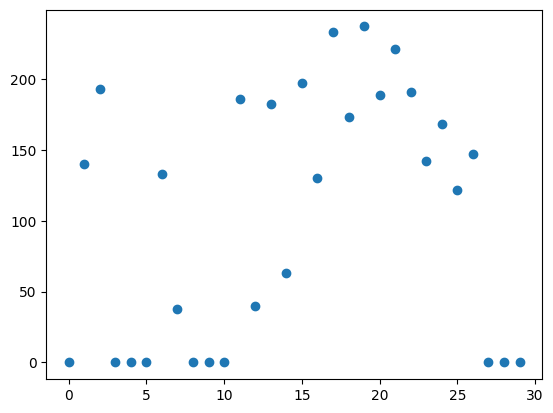

In [20]:
plt.scatter(np.arange(mC_sums.shape[0]) , mC_sums)

([<matplotlib.axis.XTick at 0x729ab410d150>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'C'),
  Text(2, 0, 'G'),
  Text(3, 0, 'C'),
  Text(4, 0, 'C'),
  Text(5, 0, 'C'),
  Text(6, 0, 'C'),
  Text(7, 0, 'G'),
  Text(8, 0, 'A'),
  Text(9, 0, 'G'),
  Text(10, 0, 'G'),
  Text(11, 0, 'C'),
  Text(12, 0, 'G'),
  Text(13, 0, 'C'),
  Text(14, 0, 'G'),
  Text(15, 0, 'C'),
  Text(16, 0, 'G'),
  Text(17, 0, 'C'),
  Text(18, 0, 'G'),
  Text(19, 0, 'C'),
  Text(20, 0, 'G'),
  Text(21, 0, 'C'),
  Text(22, 0, 'G'),
  Text(23, 0, 'C'),
  Text(24, 0, 'G'),
  Text(25, 0, 'C'),
  Text(26, 0, 'G'),
  Text(27, 0, 'C'),
  Text(28, 0, 'A'),
  Text(29, 0, 'C')])

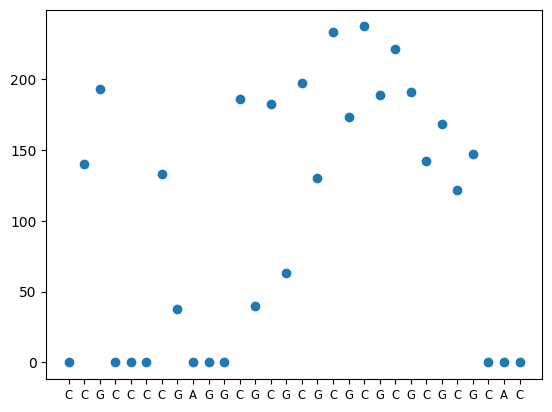

In [21]:
plt.scatter(np.arange(mC_sums.shape[0]) , mC_sums)

plt.xticks(range(len(ref_seq_list)), ref_seq_list, size='small')

([<matplotlib.axis.XTick at 0x729ab1914610>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'C'),
  Text(2, 0, 'G'),
  Text(3, 0, 'C'),
  Text(4, 0, 'C'),
  Text(5, 0, 'C'),
  Text(6, 0, 'C'),
  Text(7, 0, 'G'),
  Text(8, 0, 'A'),
  Text(9, 0, 'G'),
  Text(10, 0, 'G'),
  Text(11, 0, 'C'),
  Text(12, 0, 'G'),
  Text(13, 0, 'C'),
  Text(14, 0, 'G'),
  Text(15, 0, 'C'),
  Text(16, 0, 'G'),
  Text(17, 0, 'C'),
  Text(18, 0, 'G'),
  Text(19, 0, 'C'),
  Text(20, 0, 'G'),
  Text(21, 0, 'C'),
  Text(22, 0, 'G'),
  Text(23, 0, 'C'),
  Text(24, 0, 'G'),
  Text(25, 0, 'C'),
  Text(26, 0, 'G'),
  Text(27, 0, 'C'),
  Text(28, 0, 'A'),
  Text(29, 0, 'C')])

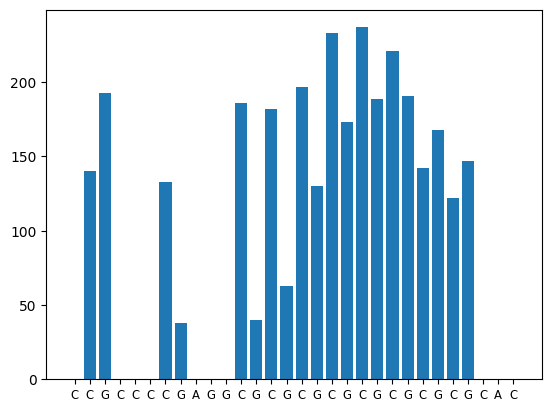

In [23]:
plt.bar(np.arange(mC_sums.shape[0]) , mC_sums)

plt.xticks(range(len(ref_seq_list)), ref_seq_list, size='small')

([<matplotlib.axis.XTick at 0x729ab0f24810>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'C'),
  Text(2, 0, 'G'),
  Text(3, 0, 'C'),
  Text(4, 0, 'C'),
  Text(5, 0, 'C'),
  Text(6, 0, 'C'),
  Text(7, 0, 'G'),
  Text(8, 0, 'A'),
  Text(9, 0, 'G'),
  Text(10, 0, 'G'),
  Text(11, 0, 'C'),
  Text(12, 0, 'G'),
  Text(13, 0, 'C'),
  Text(14, 0, 'G'),
  Text(15, 0, 'C'),
  Text(16, 0, 'G'),
  Text(17, 0, 'C'),
  Text(18, 0, 'G'),
  Text(19, 0, 'C'),
  Text(20, 0, 'G'),
  Text(21, 0, 'C'),
  Text(22, 0, 'G'),
  Text(23, 0, 'C'),
  Text(24, 0, 'G'),
  Text(25, 0, 'C'),
  Text(26, 0, 'G'),
  Text(27, 0, 'C'),
  Text(28, 0, 'A'),
  Text(29, 0, 'C')])

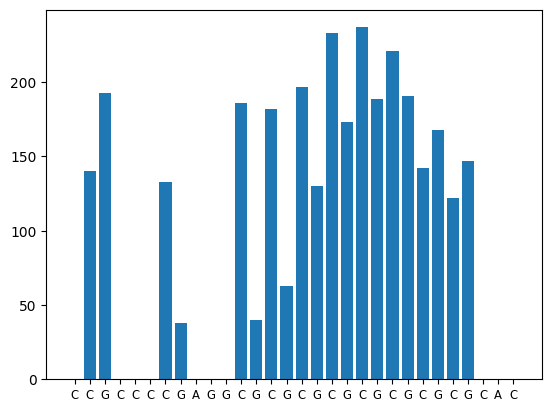

In [24]:
plt.bar(np.arange(mC_sums.shape[0]) , mC_sums )

plt.xticks(range(len(ref_seq_list)), ref_seq_list, size='small')

In [25]:

# seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
# print(seq)
# seq_list =  [s for s in seq]
# plt.xticks(range(len(seq_list)), seq_list, size='small')

In [26]:
mC_sums / padded_reads_df.shape[0]

array([0.        , 0.14271152, 0.19673802, 0.        , 0.        ,
       0.        , 0.13557594, 0.03873598, 0.        , 0.        ,
       0.        , 0.18960245, 0.04077472, 0.18552497, 0.06422018,
       0.20081549, 0.13251784, 0.23751274, 0.17635066, 0.24159021,
       0.19266055, 0.22528033, 0.19469929, 0.14475025, 0.17125382,
       0.1243629 , 0.14984709, 0.        , 0.        , 0.        ])

# Looking at forward and reverse

In [27]:
padded_reads_df

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
977,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
978,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ref_seq_list

['C',
 'C',
 'G',
 'C',
 'C',
 'C',
 'C',
 'G',
 'A',
 'G',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'A',
 'C']

In [29]:
seq_str = ''.join(ref_seq_list)
seq_str

'CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC'

In [30]:
seq_pd = pd.DataFrame([ref_seq_list, np.arange(30)])
seq_pd

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
1,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29


In [31]:
len(seq_str)

30

In [32]:
CG_pair_idx = []

for i in range(len(seq_str) - 1):
  if ref_seq_list[i] == 'C' and ref_seq_list[i+1] == 'G':
    print(ref_seq_list[i], ref_seq_list[i+1])
    CG_pair_idx.append(i)
CG_pair_idx

C G
C G
C G
C G
C G
C G
C G
C G
C G
C G


[1, 6, 11, 13, 15, 17, 19, 21, 23, 25]

In [33]:
len(CG_pair_idx)

10

In [34]:
seq_str

'CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC'

In [35]:
"CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC"

'CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC'

In [36]:
bases_idxs = padded_reads_df.columns
bases_idxs

Index(['C', 'C', 'G', 'C', 'C', 'C', 'C', 'G', 'A', 'G', 'G', 'C', 'G', 'C',
       'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C',
       'A', 'C'],
      dtype='object')

In [37]:
padded_reads_df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [38]:
padded_reads_df.columns = np.arange(len(padded_reads_df.columns)) # seq_list
# padded_reads_df.columns.unique()
padded_reads_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
977,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
978,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
C_CG_pair_idx = np.array(CG_pair_idx)
C_CG_pair_idx

array([ 1,  6, 11, 13, 15, 17, 19, 21, 23, 25])

In [40]:
G_CG_pair_idx = C_CG_pair_idx + 1
G_CG_pair_idx

array([ 2,  7, 12, 14, 16, 18, 20, 22, 24, 26])

In [41]:
bases_idxs[C_CG_pair_idx]

Index(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype='object')

In [42]:
C_reads_df = padded_reads_df[C_CG_pair_idx] #bases_idxs[C_CG_pair_idx]]
print(np.array(ref_seq_list)[C_CG_pair_idx])
C_reads_df

['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']


,1,6,11,13,15,17,19,21,23,25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
C_reads_df.describe()

,1,6,11,13,15,17,19,21,23,25
count,140.0,133.0,186.0,182.0,197.0,233.0,237.0,221.0,142.0,122.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
C_reads_df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,971,972,973,974,975,976,977,978,979,980
count,0.0,0.0,0.0,0.0,7.0,7.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [45]:
C_reads_df.sum(axis=0)

1     140.0
6     133.0
11    186.0
13    182.0
15    197.0
17    233.0
19    237.0
21    221.0
23    142.0
25    122.0
dtype: float64

In [46]:
C_reads_df.sum(axis=1)

0      0.0
1      0.0
2      0.0
3      0.0
4      7.0
      ... 
976    0.0
977    0.0
978    0.0
979    0.0
980    0.0
Length: 981, dtype: float64

In [47]:
fwd_reads_bools = C_reads_df.sum(axis=1) != 0
fwd_reads_bools

0      False
1      False
2      False
3      False
4       True
       ...  
976    False
977    False
978    False
979    False
980    False
Length: 981, dtype: bool

In [48]:
sum(fwd_reads_bools)

554

In [49]:
G_reads_df = padded_reads_df[G_CG_pair_idx] #bases_idxs[G_CG_pair_idx]]
print( np.array(ref_seq_list)[G_CG_pair_idx])
G_reads_df

['G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G']


,2,7,12,14,16,18,20,22,24,26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
976,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
977,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
978,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [50]:
G_reads_df.describe()

,2,7,12,14,16,18,20,22,24,26
count,193.0,38.0,40.0,63.0,130.0,173.0,189.0,191.0,168.0,147.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [51]:
rvs_reads_bools = G_reads_df.sum(axis=1) != 0
rvs_reads_bools

0       True
1       True
2       True
3       True
4      False
       ...  
976     True
977     True
978     True
979     True
980     True
Length: 981, dtype: bool

In [52]:
sum(rvs_reads_bools)

427

In [53]:
sum(rvs_reads_bools) + sum(fwd_reads_bools)

981

In [54]:
sum((1 - rvs_reads_bools).astype(bool) != fwd_reads_bools)

0

! Yay - the rev and forward strings are cleare and fully have Cs and Gs reverse methylated

Make sure that the frv string don't have Gs methyl signal; and rev don't have mC signal

In [55]:
padded_reads_df[fwd_reads_bools][G_CG_pair_idx].sum(axis=0)
# padded_reads_df[fwd_reads_bools][bases_idxs[G_CG_pair_idx]].sum(axis=0)

2     0.0
7     0.0
12    0.0
14    0.0
16    0.0
18    0.0
20    0.0
22    0.0
24    0.0
26    0.0
dtype: float64

In [56]:
padded_reads_df[rvs_reads_bools][C_CG_pair_idx].sum(axis=0)
# padded_reads_df[rvs_reads_bools][bases_idxs[C_CG_pair_idx]].sum(axis=0)

1     0.0
6     0.0
11    0.0
13    0.0
15    0.0
17    0.0
19    0.0
21    0.0
23    0.0
25    0.0
dtype: float64

In [57]:
padded_reads_df[rvs_reads_bools].sum(axis=0)

0       0.0
1       0.0
2     193.0
3       0.0
4       0.0
5       0.0
6       0.0
7      38.0
8       0.0
9       0.0
10      0.0
11      0.0
12     40.0
13      0.0
14     63.0
15      0.0
16    130.0
17      0.0
18    173.0
19      0.0
20    189.0
21      0.0
22    191.0
23      0.0
24    168.0
25      0.0
26    147.0
27      0.0
28      0.0
29      0.0
dtype: float64

In [58]:
fwd_stats = padded_reads_df[fwd_reads_bools][C_CG_pair_idx].sum(axis=0)
# fwd_stats = padded_reads_df[fwd_reads_bools][bases_idxs[C_CG_pair_idx]].sum(axis=0)

fwd_stats

1     140.0
6     133.0
11    186.0
13    182.0
15    197.0
17    233.0
19    237.0
21    221.0
23    142.0
25    122.0
dtype: float64

In [59]:
fwd_reads_bools.sum()

np.int64(554)

In [60]:
fwd_stats / fwd_reads_bools.sum()

1     0.252708
6     0.240072
11    0.335740
13    0.328520
15    0.355596
17    0.420578
19    0.427798
21    0.398917
23    0.256318
25    0.220217
dtype: float64

In [61]:
# padded_reads_df[rvs_reads_bools][bases_idxs[G_CG_pair_idx]].sum(axis=0)
padded_reads_df[rvs_reads_bools][G_CG_pair_idx].sum(axis=0)

2     193.0
7      38.0
12     40.0
14     63.0
16    130.0
18    173.0
20    189.0
22    191.0
24    168.0
26    147.0
dtype: float64

In [62]:
padded_reads_df[rvs_reads_bools].sum(axis=0)

0       0.0
1       0.0
2     193.0
3       0.0
4       0.0
5       0.0
6       0.0
7      38.0
8       0.0
9       0.0
10      0.0
11      0.0
12     40.0
13      0.0
14     63.0
15      0.0
16    130.0
17      0.0
18    173.0
19      0.0
20    189.0
21      0.0
22    191.0
23      0.0
24    168.0
25      0.0
26    147.0
27      0.0
28      0.0
29      0.0
dtype: float64

In [63]:
G_revs_df = padded_reads_df[rvs_reads_bools][G_CG_pair_idx]
# G_revs_df = padded_reads_df[rvs_reads_bools][bases_idxs[G_CG_pair_idx]]
G_revs_df

,2,7,12,14,16,18,20,22,24,26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
976,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
977,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
978,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


<Axes: >

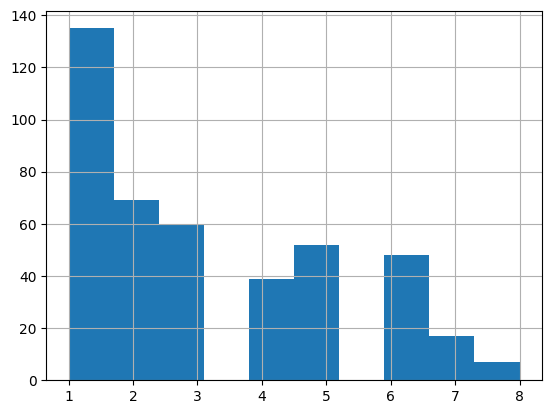

In [64]:
G_revs_df.sum(axis=1).hist()

In [65]:
C_fwd_df = padded_reads_df[fwd_reads_bools][C_CG_pair_idx]
# C_fwd_df = padded_reads_df[fwd_reads_bools][bases_idxs[C_CG_pair_idx]]
C_fwd_df

,1,6,11,13,15,17,19,21,23,25
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
955,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0
961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
965,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [66]:
C_fwd_df

,1,6,11,13,15,17,19,21,23,25
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
955,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0
961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
965,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [67]:
C_fwd_df.describe()

,1,6,11,13,15,17,19,21,23,25
count,140.0,133.0,186.0,182.0,197.0,233.0,237.0,221.0,142.0,122.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


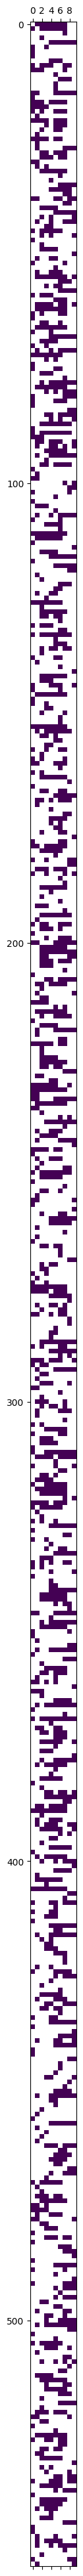

In [68]:
plt.figure(figsize=(10,50))
plt.matshow(C_fwd_df, fignum=1)

In [69]:
C_fwd_df.fillna(-1)

,1,6,11,13,15,17,19,21,23,25
4,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
5,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
9,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
955,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
961,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
965,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
966,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


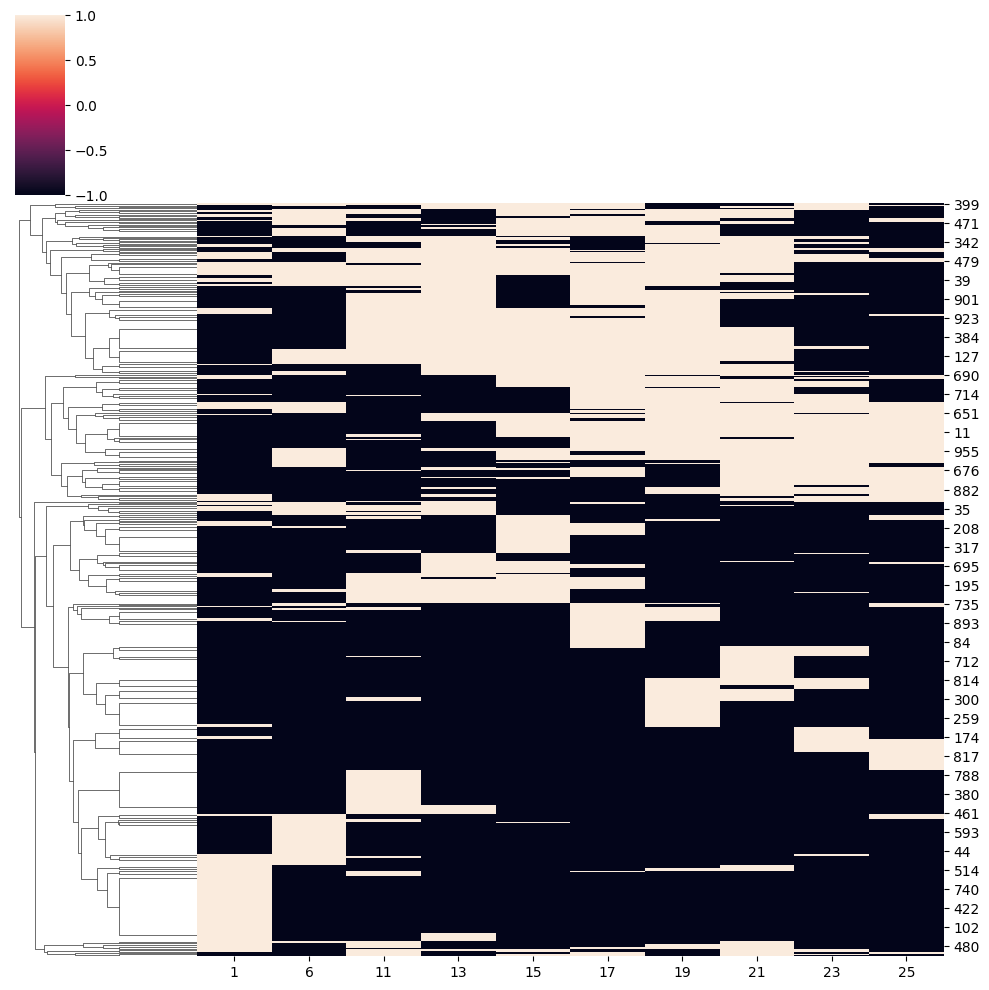

In [70]:
# import scipy

sns.clustermap(C_fwd_df.fillna(-1),col_cluster=False)

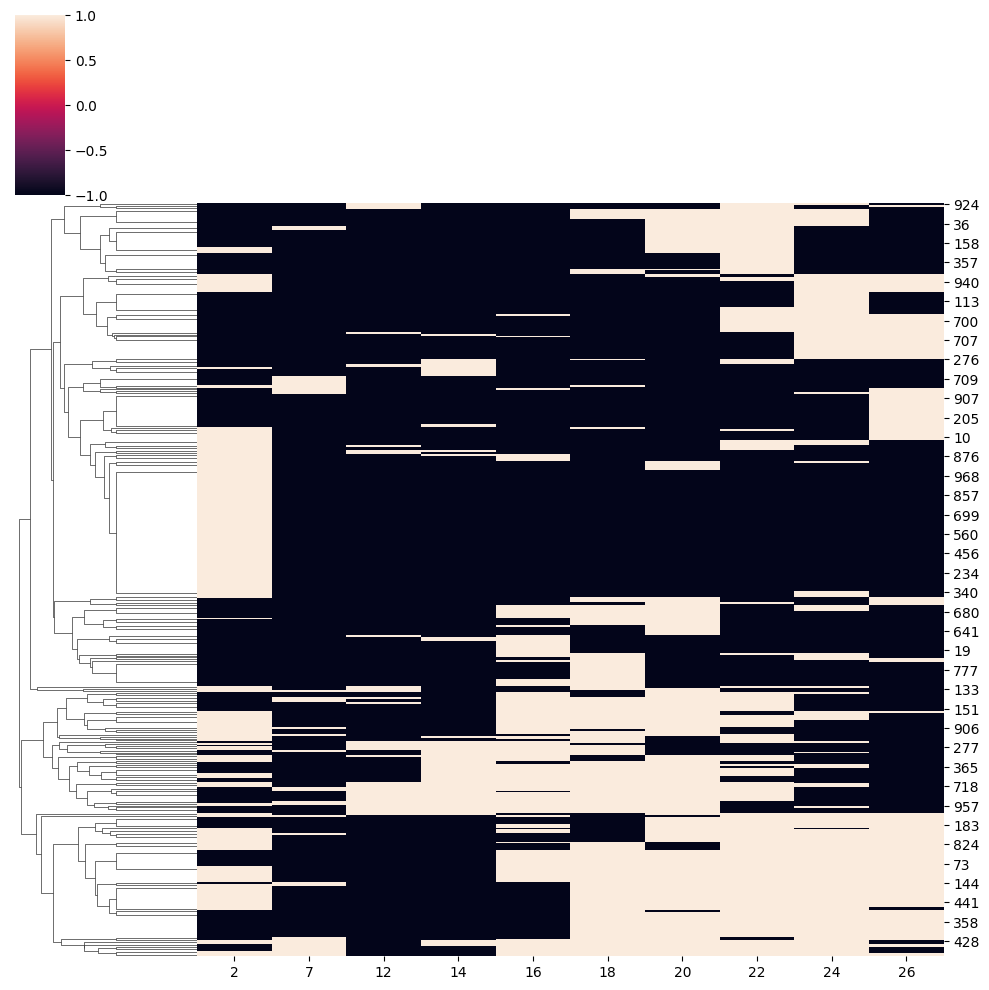

In [71]:
sns.clustermap(G_revs_df.fillna(-1),col_cluster=False)

In [72]:
pd.concat([C_fwd_df, G_revs_df], axis=1)

,1,6,11,13,15,17,19,21,23,25,2,7,12,14,16,18,20,22,24,26
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [73]:
CGs_all = np.concatenate([np.array(C_fwd_df), np.array(G_revs_df)], axis=0)
CGs_all.shape, CGs_all

((981, 10),
 array([[nan,  1.,  1., ...,  1., nan, nan],
        [ 1., nan,  1., ...,  1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
        [ 1., nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ...,  1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]))

In [74]:
np.array(C_fwd_df)

array([[nan,  1.,  1., ...,  1., nan, nan],
       [ 1., nan,  1., ...,  1., nan, nan],
       [nan, nan, nan, ...,  1., nan, nan],
       ...,
       [nan, nan,  1., ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan,  1.,  1.],
       [nan,  1., nan, ..., nan, nan,  1.]])

Text(0.5, 1.0, 'CG signal ClusterMap (bright = mC, dark = C)')

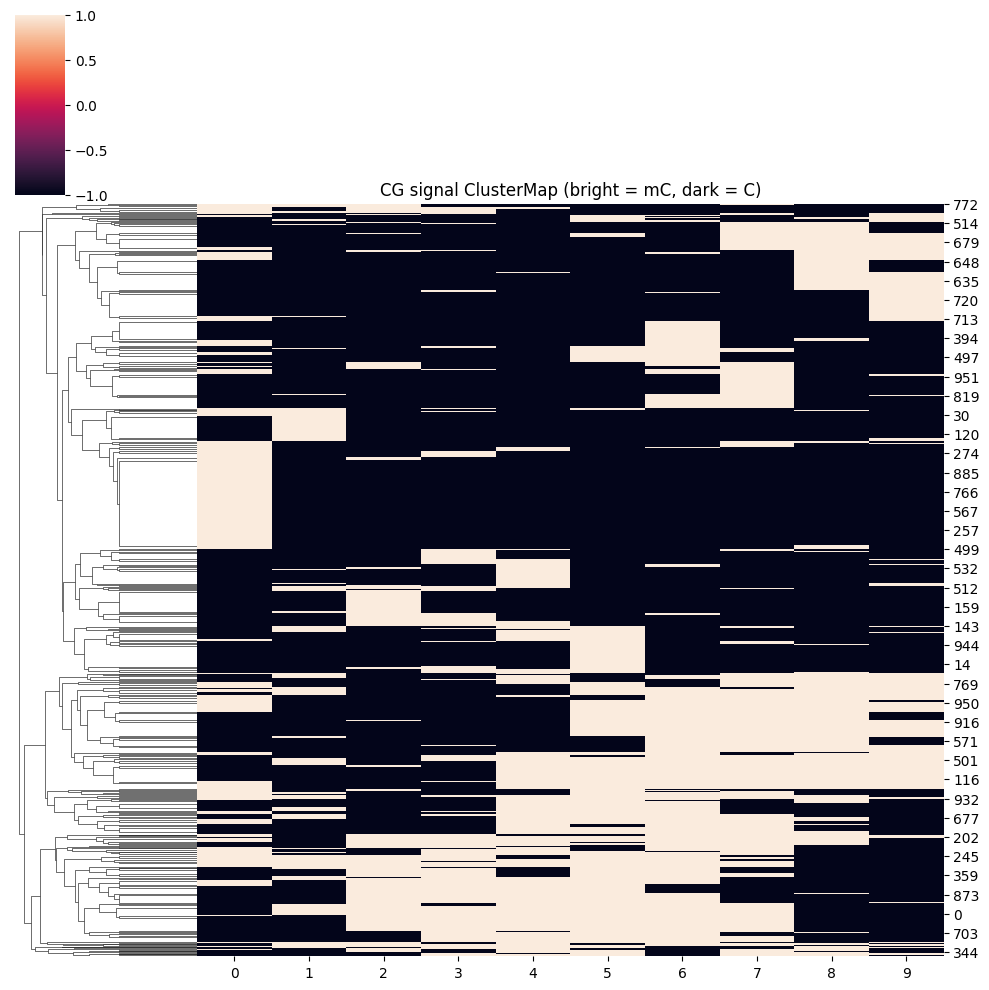

In [75]:
g = sns.clustermap(pd.DataFrame(CGs_all).fillna(-1),col_cluster=False)
g.ax_heatmap.set_title("CG signal ClusterMap (bright = mC, dark = C)")

In [76]:
pd.DataFrame(CGs_all).describe()

,0,1,2,3,4,5,6,7,8,9
count,333.0,171.0,226.0,245.0,327.0,406.0,426.0,412.0,310.0,269.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [77]:
sum(fwd_reads_bools), sum(rvs_reads_bools)

(554, 427)

Text(0.5, 1.0, 'CG Heatmap ordered by Fwd (first 331), Rev (next 435) (bright = mC, dark = C)')

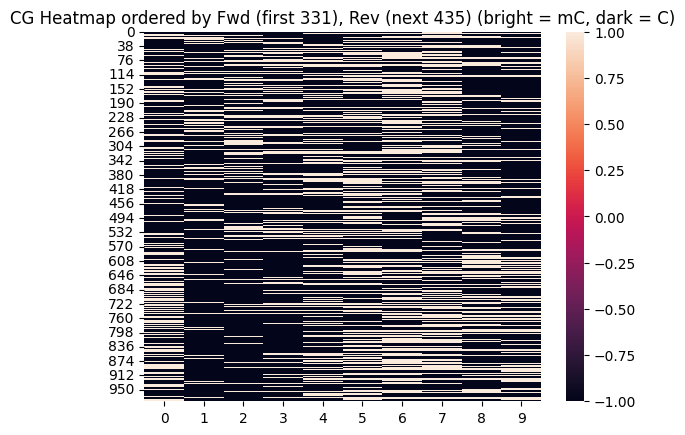

In [78]:
g = sns.heatmap(pd.DataFrame(CGs_all).fillna(-1)) # ,col_cluster=False)
g.set_title("CG Heatmap ordered by Fwd (first 331), Rev (next 435) (bright = mC, dark = C)")

<BarContainer object of 10 artists>

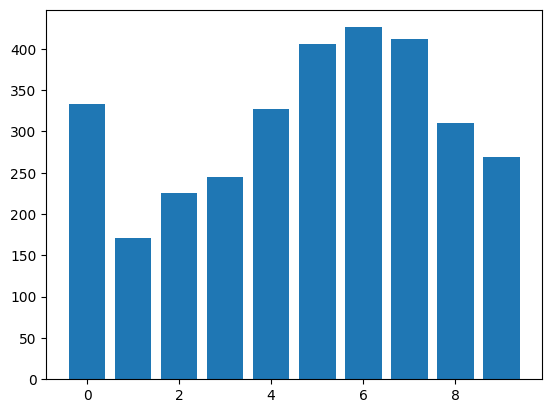

In [79]:
CGs_all_sums = np.nansum(CGs_all, axis=0)
CGs_all_sums.shape, mC_sums

plt.bar(np.arange(CGs_all_sums.shape[0]) , CGs_all_sums )
# plt.xticks(range(len(seq_list)), seq_list, size='small')

In [80]:
CGs_all_on_fwd_C_sums = np.zeros_like(mC_sums)
CGs_all_on_fwd_C_sums

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
CGs_all_on_fwd_C_sums[C_CG_pair_idx] = CGs_all_sums
CGs_all_on_fwd_C_sums

array([  0., 333.,   0.,   0.,   0.,   0., 171.,   0.,   0.,   0.,   0.,
       226.,   0., 245.,   0., 327.,   0., 406.,   0., 426.,   0., 412.,
         0., 310.,   0., 269.,   0.,   0.,   0.,   0.])

Text(0.5, 1.0, 'Total sum of mCs (fwd+rvs) in the T cells Cas9 data')

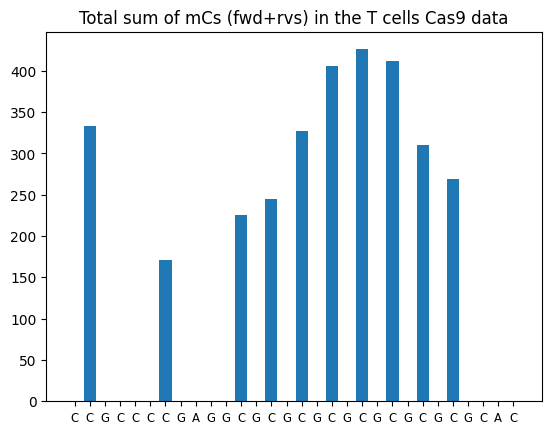

In [83]:
plt.bar(np.arange(CGs_all_on_fwd_C_sums.shape[0]) , CGs_all_on_fwd_C_sums )
plt.xticks(range(len(ref_seq_list)), ref_seq_list, size='small')
plt.title("Total sum of mCs (fwd+rvs) in the T cells Cas9 data")

In [84]:
mC_fracs =  CGs_all_on_fwd_C_sums / len(fwd_reads_bools)
mC_fracs

array([0.        , 0.33944954, 0.        , 0.        , 0.        ,
       0.        , 0.17431193, 0.        , 0.        , 0.        ,
       0.        , 0.23037717, 0.        , 0.24974516, 0.        ,
       0.33333333, 0.        , 0.4138634 , 0.        , 0.43425076,
       0.        , 0.41997961, 0.        , 0.31600408, 0.        ,
       0.27420999, 0.        , 0.        , 0.        , 0.        ])

Text(0.5, 1.0, 'Fractions of mC [mC_sums / num_reads]')

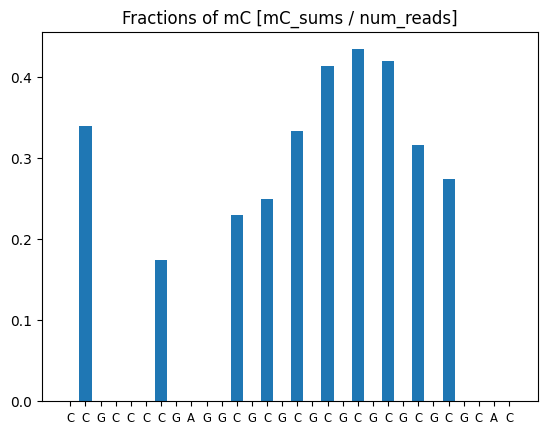

In [85]:
plt.bar(np.arange(mC_fracs.shape[0]) , mC_fracs )
plt.xticks(range(len(ref_seq_list)), ref_seq_list, size='small')
plt.title("Fractions of mC [mC_sums / num_reads]")

#Save np arrays of the resulting CG units

In [103]:
# cd55_30pbRIO_padded_reads_24Apr16.npy
save_name = "positive_10_CGunits_766_reads_cd55_30pbRIO_cas9_12ef_101923_extracts_24Apr23"
save_name_np = save_name + ".npy"

np.save(Path(save_folder_path, save_name_np), CGs_all)

In [ ]:
# cd55_30pbRIO_padded_reads_24Apr16.npy
# save_name = "deepCTCF_thresh0_001_cd55_30pbRIO_padded_reads_24Apr23"
# save_name_np = save_name + ".npy"

# np.save(Path(save_folder_path, save_name_np), padded_reads)

In [163]:
# save_name_csv = "cd55_30pbRIO_padded_reads_24Apr16.csv"
save_name_csv = save_name + ".csv"

padded_reads_pd = pd.read_csv(Path(save_folder_path,save_name_csv), index_col=0)
padded_reads_pd

,C,C.1,G,C.2,C.3,C.4,C.5,G.1,A,G.2,...,G.8,C.11,G.9,C.12,G.10,C.13,G.11,C.14,A.1,C.15
0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
padded_reads_pd.columns

Index(['C', 'C.1', 'G', 'C.2', 'C.3', 'C.4', 'C.5', 'G.1', 'A', 'G.2', 'G.3',
       'C.6', 'G.4', 'C.7', 'G.5', 'C.8', 'G.6', 'C.9', 'G.7', 'C.10', 'G.8',
       'C.11', 'G.9', 'C.12', 'G.10', 'C.13', 'G.11', 'C.14', 'A.1', 'C.15'],
      dtype='object')

In [ ]:

x = np.arange(len(ref_seq_ROI[0]))
labels = list(ref_seq_ROI[0])
x, labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 ['G',
  'G',
  'C',
  'G',
  'T',
  'T',
  'T',
  'T',
  'G',
  'G',
  'T',
  'C',
  'G',
  'T',
  'T',
  'C',
  'A',
  'A',
  'A',
  'A',
  'A',
  'T',
  'A',
  'A',
  'T',
  'C',
  'A',
  'C',
  'T',
  'A',
  'A',
  'A',
  'A',
  'G',
  'T',
  'T',
  'T',
  'T',
  'C',
  'C',
  'C',
  'C',
  'T',
  'C',
  'C',
  'C',
  'T',
  'C',
  'A',
  'C',
  'A',
  'T',
  'G',
  'C',
  'T',
  'T',
  'A',
  'T',
  'C',
  'C',
  'C',
  'A',
  'C',
  'A',
  'C',
  'C',
  'C',
  'A',
  'G',
  'T',
  'G',
  'T',
  'C',
  'T',
  'C',
  'T',
  'A',
  'G',
  'T',
  'G',
  'C',
  'A',
  'C'])

In [ ]:

x = np.arange(len(ref_seq_ROI[0]))
labels = list(ref_seq_ROI[0])
x, labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 ['G',
  'G',
  'C',
  'G',
  'T',
  'T',
  'T',
  'T',
  'G',
  'G',
  'T',
  'C',
  'G',
  'T',
  'T',
  'C',
  'A',
  'A',
  'A',
  'A',
  'A',
  'T',
  'A',
  'A',
  'T',
  'C',
  'A',
  'C',
  'T',
  'A',
  'A',
  'A',
  'A',
  'G',
  'T',
  'T',
  'T',
  'T',
  'C',
  'C',
  'C',
  'C',
  'T',
  'C',
  'C',
  'C',
  'T',
  'C',
  'A',
  'C',
  'A',
  'T',
  'G',
  'C',
  'T',
  'T',
  'A',
  'T',
  'C',
  'C',
  'C',
  'A',
  'C',
  'A',
  'C',
  'C',
  'C',
  'A',
  'G',
  'T',
  'G',
  'T',
  'C',
  'T',
  'C',
  'T',
  'A',
  'G',
  'T',
  'G',
  'C',
  'A',
  'C'])

In [ ]:

x = np.arange(len(ref_seq_ROI[0]))
labels = list(ref_seq_ROI[0])

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = x,
        ticktext = labels,
        tickangle = 0,
    )
)


fig.show()

In [ ]:
import plotly.graph_objects as go

def get_reads_in_ROI(chr, coord_start, coord_end, f, first_N_reads, do_plot=True):
  '''
    first_N_reads - int - look within the "first_N_reads"
    do_plot - bool - make plots
  '''

  ref_seq_ROI = []
  valCpG_ROI = []
  modCpG_ROI = []

  fig = go.Figure()

  for read_num in range(first_N_reads): #(f['read_name'][0].shape[0])
    print("read_num", read_num)
    # read_i = f[read_num]
    # print("read_i", read_i)

    ref_seq_i, valCpG_i, modCpG_i, coord_end_index_i, coord_start_index_i = get_read_info_in_region_of_interest(read_num, chr, coord_start, coord_end, f)

    ref_seq_ROI.append(ref_seq_i)

    valCpG_ROI.append(valCpG_i)
    modCpG_ROI.append(modCpG_i)

    y = valCpG_i

    labels = list(ref_seq_i)
    x = np.arange(len(ref_seq_i))
    # Add traces
    if do_plot:
      fig.add_trace(go.Scatter(x=x, y=valCpG_i,
                          mode='markers',
                          name='valCpG_read_' + str(read_num),
                          opacity=0.5,))
      # Add traces
      fig.add_trace(go.Scatter(x=x, y=modCpG_i,
                          mode='markers',
                          name='modCpG_read_' + str(read_num),
                          opacity=0.5,))


  x = np.arange(len(ref_seq_ROI[0]))
  labels = list(ref_seq_ROI[0])

  if do_plot:
    fig.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals = x,
            ticktext = labels,
            tickangle = 0,
        )
    )
    fig.show()

  return(ref_seq_ROI, valCpG_ROI, modCpG_ROI, fig)



first_N_reads = 3
ref_seq_ROI_DifM, valCpG_ROI_DifM, modCpG_ROI_DifM, fig = get_reads_in_ROI(chr, coord_start, coord_end, f, first_N_reads, do_plot=True)

In [ ]:

x = np.arange(len(ref_seq_ROI[2]))
labels = list(ref_seq_ROI[2])

do_plot = True
if do_plot:
  fig_DifM.update_layout(
      xaxis = dict(
          tickmode = 'array',
          tickvals = x,
          ticktext = labels,
          tickangle = 0,
      )
  )

fig_DifM.show()